In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

C:\Users\arneg\anaconda3\envs\jupyter\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:36,  3.23it/s]                                                                                               


Epoch 1 of 100
Generator loss: 1.51062430, Discriminator loss: 0.85363118


118it [00:35,  3.28it/s]                                                                                               


Epoch 2 of 100
Generator loss: 2.81840422, Discriminator loss: 1.47251541


118it [00:36,  3.26it/s]                                                                                               


Epoch 3 of 100
Generator loss: 5.47976843, Discriminator loss: 0.33509978


118it [00:36,  3.25it/s]                                                                                               


Epoch 4 of 100
Generator loss: 1.50454323, Discriminator loss: 1.21710371


118it [00:36,  3.22it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


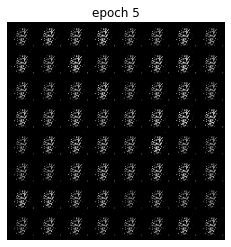

Epoch 5 of 100
Generator loss: 2.22320803, Discriminator loss: 1.07126772


118it [00:36,  3.27it/s]                                                                                               


Epoch 6 of 100
Generator loss: 2.29320976, Discriminator loss: 1.13281176


118it [00:35,  3.31it/s]                                                                                               


Epoch 7 of 100
Generator loss: 1.07566407, Discriminator loss: 1.30471507


118it [00:36,  3.25it/s]                                                                                               


Epoch 8 of 100
Generator loss: 1.73752373, Discriminator loss: 0.84299609


118it [00:35,  3.28it/s]                                                                                               


Epoch 9 of 100
Generator loss: 1.07332826, Discriminator loss: 1.35318928


118it [00:35,  3.28it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


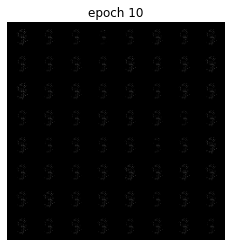

Epoch 10 of 100
Generator loss: 1.41271232, Discriminator loss: 1.00878944


118it [00:36,  3.26it/s]                                                                                               


Epoch 11 of 100
Generator loss: 1.23759988, Discriminator loss: 1.14296431


118it [00:35,  3.29it/s]                                                                                               


Epoch 12 of 100
Generator loss: 2.07402315, Discriminator loss: 1.00451229


118it [00:36,  3.25it/s]                                                                                               


Epoch 13 of 100
Generator loss: 2.85553144, Discriminator loss: 0.84221268


118it [00:35,  3.30it/s]                                                                                               


Epoch 14 of 100
Generator loss: 2.14082543, Discriminator loss: 1.34820261


118it [00:36,  3.28it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


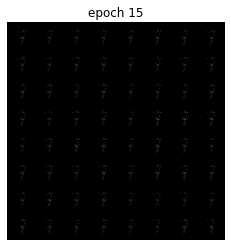

Epoch 15 of 100
Generator loss: 1.90597657, Discriminator loss: 1.00295451


118it [00:35,  3.28it/s]                                                                                               


Epoch 16 of 100
Generator loss: 1.38916340, Discriminator loss: 0.97001376


118it [00:36,  3.27it/s]                                                                                               


Epoch 17 of 100
Generator loss: 2.29505875, Discriminator loss: 0.64463904


118it [00:35,  3.29it/s]                                                                                               


Epoch 18 of 100
Generator loss: 2.14844398, Discriminator loss: 0.76931493


118it [00:35,  3.28it/s]                                                                                               


Epoch 19 of 100
Generator loss: 2.15805000, Discriminator loss: 0.58076891


118it [00:35,  3.28it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


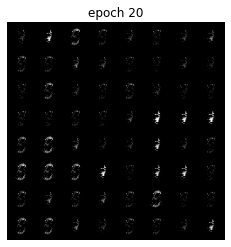

Epoch 20 of 100
Generator loss: 3.19300349, Discriminator loss: 0.34964910


118it [00:36,  3.27it/s]                                                                                               


Epoch 21 of 100
Generator loss: 3.02197558, Discriminator loss: 0.43185764


118it [00:35,  3.28it/s]                                                                                               


Epoch 22 of 100
Generator loss: 2.76551081, Discriminator loss: 0.55503379


118it [00:35,  3.28it/s]                                                                                               


Epoch 23 of 100
Generator loss: 2.72474910, Discriminator loss: 0.53658311


118it [00:36,  3.26it/s]                                                                                               


Epoch 24 of 100
Generator loss: 2.22310580, Discriminator loss: 0.67434125


118it [00:35,  3.29it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


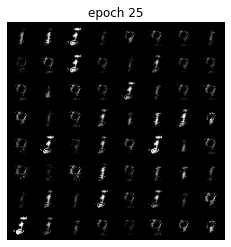

Epoch 25 of 100
Generator loss: 2.83576046, Discriminator loss: 0.46965811


118it [00:35,  3.30it/s]                                                                                               


Epoch 26 of 100
Generator loss: 3.35861245, Discriminator loss: 0.49886993


118it [00:35,  3.31it/s]                                                                                               


Epoch 27 of 100
Generator loss: 3.01916095, Discriminator loss: 0.48230663


118it [00:35,  3.30it/s]                                                                                               


Epoch 28 of 100
Generator loss: 2.97379465, Discriminator loss: 0.54124215


118it [00:35,  3.31it/s]                                                                                               


Epoch 29 of 100
Generator loss: 2.96937217, Discriminator loss: 0.43557108


118it [00:35,  3.30it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


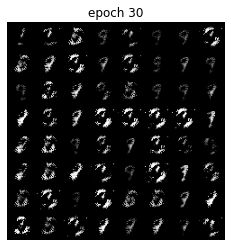

Epoch 30 of 100
Generator loss: 3.09000912, Discriminator loss: 0.50426876


118it [00:35,  3.29it/s]                                                                                               


Epoch 31 of 100
Generator loss: 2.76917295, Discriminator loss: 0.54733031


118it [00:35,  3.29it/s]                                                                                               


Epoch 32 of 100
Generator loss: 2.35357885, Discriminator loss: 0.70398583


118it [00:35,  3.31it/s]                                                                                               


Epoch 33 of 100
Generator loss: 2.59583059, Discriminator loss: 0.59070289


118it [00:35,  3.30it/s]                                                                                               


Epoch 34 of 100
Generator loss: 2.77035132, Discriminator loss: 0.52018420


118it [00:35,  3.30it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


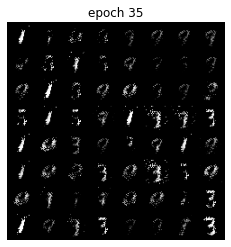

Epoch 35 of 100
Generator loss: 3.16055573, Discriminator loss: 0.41400302


118it [00:35,  3.30it/s]                                                                                               


Epoch 36 of 100
Generator loss: 2.88936432, Discriminator loss: 0.59345389


118it [00:35,  3.31it/s]                                                                                               


Epoch 37 of 100
Generator loss: 2.63065939, Discriminator loss: 0.55214408


118it [00:36,  3.27it/s]                                                                                               


Epoch 38 of 100
Generator loss: 2.84183037, Discriminator loss: 0.53295367


118it [00:35,  3.31it/s]                                                                                               


Epoch 39 of 100
Generator loss: 2.89900020, Discriminator loss: 0.50856877


118it [00:35,  3.31it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


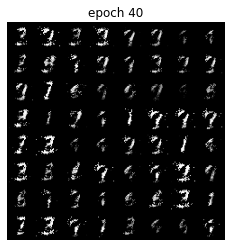

Epoch 40 of 100
Generator loss: 2.86359178, Discriminator loss: 0.56414371


118it [00:35,  3.30it/s]                                                                                               


Epoch 41 of 100
Generator loss: 2.56917307, Discriminator loss: 0.60977180


118it [00:35,  3.32it/s]                                                                                               


Epoch 42 of 100
Generator loss: 2.70968205, Discriminator loss: 0.55062493


118it [00:35,  3.30it/s]                                                                                               


Epoch 43 of 100
Generator loss: 3.12031273, Discriminator loss: 0.42522331


118it [00:35,  3.29it/s]                                                                                               


Epoch 44 of 100
Generator loss: 3.20352150, Discriminator loss: 0.44430835


118it [00:35,  3.28it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


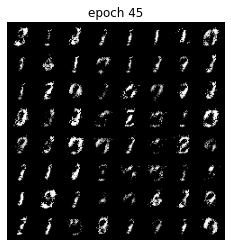

Epoch 45 of 100
Generator loss: 2.84299334, Discriminator loss: 0.56596062


118it [00:35,  3.29it/s]                                                                                               


Epoch 46 of 100
Generator loss: 2.86012127, Discriminator loss: 0.50584320


118it [00:35,  3.29it/s]                                                                                               


Epoch 47 of 100
Generator loss: 3.00265229, Discriminator loss: 0.49474590


118it [00:35,  3.30it/s]                                                                                               


Epoch 48 of 100
Generator loss: 3.14061914, Discriminator loss: 0.48426905


118it [00:35,  3.29it/s]                                                                                               


Epoch 49 of 100
Generator loss: 3.01393542, Discriminator loss: 0.50490001


118it [00:35,  3.35it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


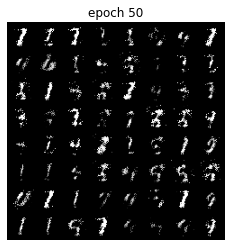

Epoch 50 of 100
Generator loss: 3.07284208, Discriminator loss: 0.55650200


118it [00:35,  3.34it/s]                                                                                               


Epoch 51 of 100
Generator loss: 2.90462165, Discriminator loss: 0.56250988


118it [00:35,  3.34it/s]                                                                                               


Epoch 52 of 100
Generator loss: 2.60518216, Discriminator loss: 0.59201734


118it [00:35,  3.34it/s]                                                                                               


Epoch 53 of 100
Generator loss: 2.69815243, Discriminator loss: 0.55015873


118it [00:35,  3.36it/s]                                                                                               


Epoch 54 of 100
Generator loss: 2.76457643, Discriminator loss: 0.56906260


118it [00:35,  3.28it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


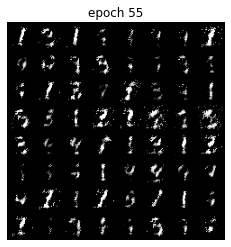

Epoch 55 of 100
Generator loss: 2.96670893, Discriminator loss: 0.50580091


118it [00:35,  3.34it/s]                                                                                               


Epoch 56 of 100
Generator loss: 3.00137182, Discriminator loss: 0.49448986


118it [00:35,  3.34it/s]                                                                                               


Epoch 57 of 100
Generator loss: 2.79857623, Discriminator loss: 0.64523479


118it [00:35,  3.34it/s]                                                                                               


Epoch 58 of 100
Generator loss: 2.38920788, Discriminator loss: 0.68291382


118it [00:35,  3.33it/s]                                                                                               


Epoch 59 of 100
Generator loss: 2.39780888, Discriminator loss: 0.64245513


118it [00:35,  3.34it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


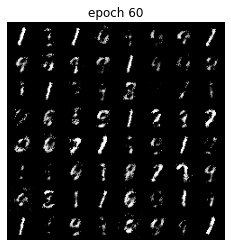

Epoch 60 of 100
Generator loss: 2.47362393, Discriminator loss: 0.59168190


118it [00:35,  3.34it/s]                                                                                               


Epoch 61 of 100
Generator loss: 2.39726441, Discriminator loss: 0.63309015


118it [00:35,  3.34it/s]                                                                                               


Epoch 62 of 100
Generator loss: 2.47589527, Discriminator loss: 0.59700755


118it [00:35,  3.33it/s]                                                                                               


Epoch 63 of 100
Generator loss: 2.41270224, Discriminator loss: 0.63844038


118it [00:35,  3.34it/s]                                                                                               


Epoch 64 of 100
Generator loss: 2.35569753, Discriminator loss: 0.63175955


118it [00:35,  3.34it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


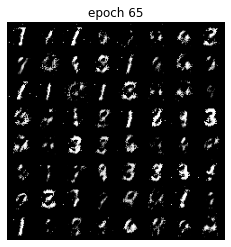

Epoch 65 of 100
Generator loss: 2.43161312, Discriminator loss: 0.67319200


118it [00:35,  3.34it/s]                                                                                               


Epoch 66 of 100
Generator loss: 2.19570094, Discriminator loss: 0.69888522


118it [00:35,  3.33it/s]                                                                                               


Epoch 67 of 100
Generator loss: 2.23903622, Discriminator loss: 0.67370726


118it [00:35,  3.33it/s]                                                                                               


Epoch 68 of 100
Generator loss: 2.36944423, Discriminator loss: 0.63556414


118it [00:35,  3.34it/s]                                                                                               


Epoch 69 of 100
Generator loss: 2.50182543, Discriminator loss: 0.61529355


118it [00:35,  3.34it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


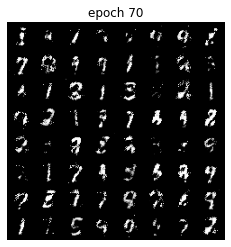

Epoch 70 of 100
Generator loss: 2.43715325, Discriminator loss: 0.64954328


118it [00:35,  3.35it/s]                                                                                               


Epoch 71 of 100
Generator loss: 2.43281659, Discriminator loss: 0.61606063


118it [00:35,  3.32it/s]                                                                                               


Epoch 72 of 100
Generator loss: 2.37750724, Discriminator loss: 0.63419269


118it [00:35,  3.33it/s]                                                                                               


Epoch 73 of 100
Generator loss: 2.36228217, Discriminator loss: 0.66071472


118it [00:35,  3.31it/s]                                                                                               


Epoch 74 of 100
Generator loss: 2.39729508, Discriminator loss: 0.65887277


118it [00:35,  3.32it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


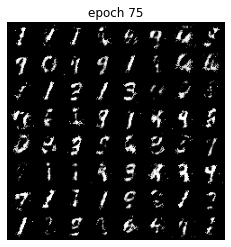

Epoch 75 of 100
Generator loss: 2.37718636, Discriminator loss: 0.69759938


118it [00:35,  3.34it/s]                                                                                               


Epoch 76 of 100
Generator loss: 2.27776963, Discriminator loss: 0.66838617


118it [00:35,  3.33it/s]                                                                                               


Epoch 77 of 100
Generator loss: 2.15618866, Discriminator loss: 0.70548736


118it [00:35,  3.33it/s]                                                                                               


Epoch 78 of 100
Generator loss: 2.18158972, Discriminator loss: 0.71593094


118it [00:35,  3.33it/s]                                                                                               


Epoch 79 of 100
Generator loss: 2.27622090, Discriminator loss: 0.65660188


118it [00:35,  3.32it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


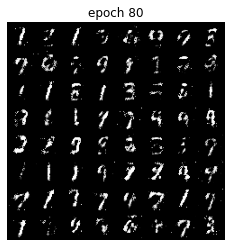

Epoch 80 of 100
Generator loss: 2.38218470, Discriminator loss: 0.66069451


118it [00:35,  3.33it/s]                                                                                               


Epoch 81 of 100
Generator loss: 2.34906360, Discriminator loss: 0.67536200


118it [00:35,  3.33it/s]                                                                                               


Epoch 82 of 100
Generator loss: 2.34782505, Discriminator loss: 0.66812914


118it [00:35,  3.30it/s]                                                                                               


Epoch 83 of 100
Generator loss: 2.35458854, Discriminator loss: 0.70745696


118it [00:35,  3.34it/s]                                                                                               


Epoch 84 of 100
Generator loss: 2.20205874, Discriminator loss: 0.68901741


118it [00:35,  3.34it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


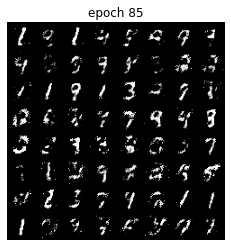

Epoch 85 of 100
Generator loss: 2.24754944, Discriminator loss: 0.73872853


118it [00:35,  3.33it/s]                                                                                               


Epoch 86 of 100
Generator loss: 2.39314285, Discriminator loss: 0.71296809


118it [00:35,  3.33it/s]                                                                                               


Epoch 87 of 100
Generator loss: 2.28583941, Discriminator loss: 0.70360960


118it [00:35,  3.32it/s]                                                                                               


Epoch 88 of 100
Generator loss: 2.30452367, Discriminator loss: 0.64749716


118it [00:35,  3.31it/s]                                                                                               


Epoch 89 of 100
Generator loss: 2.33242383, Discriminator loss: 0.66944830


118it [00:35,  3.32it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


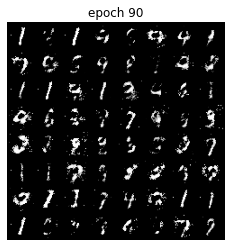

Epoch 90 of 100
Generator loss: 2.10849151, Discriminator loss: 0.77165253


118it [00:35,  3.29it/s]                                                                                               


Epoch 91 of 100
Generator loss: 2.10605240, Discriminator loss: 0.72133355


118it [00:35,  3.32it/s]                                                                                               


Epoch 92 of 100
Generator loss: 2.12194351, Discriminator loss: 0.74484941


118it [00:35,  3.33it/s]                                                                                               


Epoch 93 of 100
Generator loss: 2.07725415, Discriminator loss: 0.73675009


118it [00:35,  3.31it/s]                                                                                               


Epoch 94 of 100
Generator loss: 2.18801810, Discriminator loss: 0.70273913


118it [00:35,  3.33it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


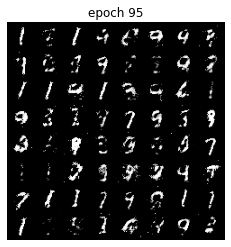

Epoch 95 of 100
Generator loss: 2.12833252, Discriminator loss: 0.73233216


118it [00:35,  3.33it/s]                                                                                               


Epoch 96 of 100
Generator loss: 2.14183455, Discriminator loss: 0.75008579


118it [00:35,  3.33it/s]                                                                                               


Epoch 97 of 100
Generator loss: 2.05670934, Discriminator loss: 0.75386604


118it [00:35,  3.33it/s]                                                                                               


Epoch 98 of 100
Generator loss: 2.11120165, Discriminator loss: 0.76083650


118it [00:35,  3.32it/s]                                                                                               


Epoch 99 of 100
Generator loss: 2.04704507, Discriminator loss: 0.74920165


118it [00:35,  3.31it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


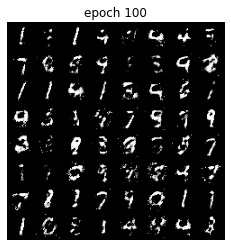

Epoch 100 of 100
Generator loss: 2.01421446, Discriminator loss: 0.75782128


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0

    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        # Discriminator training
        for _ in range(k):
            discriminator.zero_grad()
            real_data = data[0].to(device)
            label_real_data = label_real(real_data.size(0))
            output_real = discriminator(real_data)
            loss_real = discriminator_loss(output_real, label_real_data)
            loss_real.backward()

            fake_data = generator(create_noise(real_data.size(0), nz)).detach()
            label_fake_data = label_fake(fake_data.size(0))
            output_fake = discriminator(fake_data)
            loss_fake = discriminator_loss(output_fake, label_fake_data)
            loss_fake.backward()

            optim_d.step()
            loss_d += loss_real.item() + loss_fake.item()

        # Generator training
        generator.zero_grad()
        label_fake_data = label_real(batch_size)
        generated_data = generator(create_noise(batch_size, nz))
        output_fake = discriminator(generated_data)
        loss_g_i = generator_loss(output_fake, label_fake_data)
        loss_g_i.backward()
        optim_g.step()

        loss_g += loss_g_i.item()

    
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}_original.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(torch.tensor(loss_g)) #addressing error
    losses_d.append(torch.tensor(loss_d)) #addressing error
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images_original.gif', imgs)

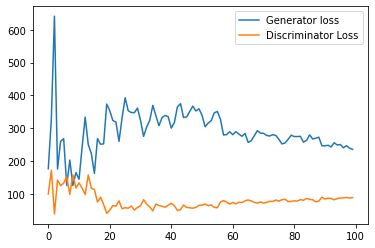

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
#plt.plot(losses_g, label='Generator loss')
#plt.plot(losses_d, label='Discriminator Loss')
plt.plot([item.detach().cpu().numpy() for item in losses_g], label='Generator loss') #changed to address error
plt.plot([item.detach().cpu().numpy() for item in losses_d], label='Discriminator Loss') #changed to address error

plt.legend()
plt.savefig('outputs/loss_original.png')

In [ ]:
# question1b: update the generator by descending its stochastic gradient

118it [00:34,  3.41it/s]                                                                                               


Epoch 1 of 100
Generator loss: 0.05827060, Discriminator loss: 0.08378079


118it [00:34,  3.37it/s]                                                                                               


Epoch 2 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:35,  3.36it/s]                                                                                               


Epoch 3 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:35,  3.36it/s]                                                                                               


Epoch 4 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:34,  3.41it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


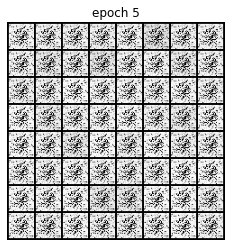

Epoch 5 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:34,  3.41it/s]                                                                                               


Epoch 6 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:34,  3.41it/s]                                                                                               


Epoch 7 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:34,  3.40it/s]                                                                                               


Epoch 8 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:34,  3.41it/s]                                                                                               


Epoch 9 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


 29%|███████████████████████▌                                                         | 34/117 [00:10<00:25,  3.26it/s]


KeyboardInterrupt: 

In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0

    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        # Discriminator training
        for _ in range(k):
            discriminator.zero_grad()
            real_data = data[0].to(device)
            label_real_data = label_real(real_data.size(0))
            output_real = discriminator(real_data)
            loss_real = discriminator_loss(output_real, label_real_data)
            loss_real.backward()

            fake_data = generator(create_noise(real_data.size(0), nz)).detach()
            label_fake_data = label_fake(fake_data.size(0))
            output_fake = discriminator(fake_data)
            loss_fake = discriminator_loss(output_fake, label_fake_data)
            loss_fake.backward()

            optim_d.step()
            loss_d += loss_real.item() + loss_fake.item()

        # Generator training
        generator.zero_grad()
        label_fake_data = label_fake(batch_size)  # Note the change in label
        generated_data = generator(create_noise(batch_size, nz))
        output_fake = discriminator(generated_data)
        loss_g_i = generator_loss(output_fake, label_fake_data)  # Note the change in label
        loss_g_i.backward()
        optim_g.step()

        loss_g += loss_g_i.item()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs_new/gen_img{epoch+1}_new.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(torch.tensor(loss_g)) #addressing error
    losses_d.append(torch.tensor(loss_d)) #addressing error
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [ ]:
#!mkdir -p outputs_new

In [ ]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs_new/generator_new.pth')

In [ ]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_new/generator_images_new.gif', imgs)

In [ ]:
# plot and save the generator and discriminator loss
plt.figure()
#plt.plot(losses_g, label='Generator loss')
#plt.plot(losses_d, label='Discriminator Loss')
plt.plot([item.detach().cpu().numpy() for item in losses_g], label='Generator loss') #changed to address error
plt.plot([item.detach().cpu().numpy() for item in losses_d], label='Discriminator Loss') #changed to address error

plt.legend()
plt.savefig('outputs_new/loss_new.png')

In [20]:
#question1c: improving GAN results

In [31]:
import torch.nn.functional as F

class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            #nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            #nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            #nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

    
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            #nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            #nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            #nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)


In [32]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

In [33]:
# Optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [34]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [35]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [36]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [37]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [38]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [39]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

118it [00:34,  3.42it/s]                                                                                               


Epoch 1 of 100
Generator loss: 0.89167097, Discriminator loss: 1.18272397


118it [00:34,  3.38it/s]                                                                                               


Epoch 2 of 100
Generator loss: 1.54922937, Discriminator loss: 0.76946011


118it [00:35,  3.30it/s]                                                                                               


Epoch 3 of 100
Generator loss: 2.72072073, Discriminator loss: 0.57294812


118it [00:35,  3.32it/s]                                                                                               


Epoch 4 of 100
Generator loss: 3.54184361, Discriminator loss: 0.51611205


118it [00:35,  3.35it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


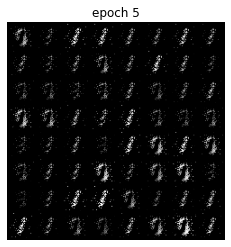

Epoch 5 of 100
Generator loss: 3.84263240, Discriminator loss: 0.47984631


118it [00:34,  3.39it/s]                                                                                               


Epoch 6 of 100
Generator loss: 3.24276569, Discriminator loss: 0.56024152


118it [00:34,  3.42it/s]                                                                                               


Epoch 7 of 100
Generator loss: 3.70793428, Discriminator loss: 0.48957953


118it [00:34,  3.43it/s]                                                                                               


Epoch 8 of 100
Generator loss: 3.26317444, Discriminator loss: 0.59516289


118it [00:34,  3.43it/s]                                                                                               


Epoch 9 of 100
Generator loss: 3.11023586, Discriminator loss: 0.58230984


118it [00:34,  3.43it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


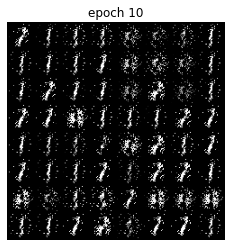

Epoch 10 of 100
Generator loss: 3.83449451, Discriminator loss: 0.39627457


118it [00:34,  3.42it/s]                                                                                               


Epoch 11 of 100
Generator loss: 3.71709069, Discriminator loss: 0.45955734


118it [00:34,  3.43it/s]                                                                                               


Epoch 12 of 100
Generator loss: 3.01068934, Discriminator loss: 0.50452798


118it [00:34,  3.43it/s]                                                                                               


Epoch 13 of 100
Generator loss: 3.55551152, Discriminator loss: 0.43690116


118it [00:34,  3.42it/s]                                                                                               


Epoch 14 of 100
Generator loss: 3.06734221, Discriminator loss: 0.43685381


118it [00:34,  3.43it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


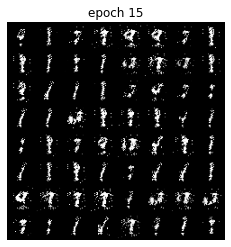

Epoch 15 of 100
Generator loss: 3.20025397, Discriminator loss: 0.40743603


118it [00:34,  3.43it/s]                                                                                               


Epoch 16 of 100
Generator loss: 3.46922142, Discriminator loss: 0.40625029


118it [00:34,  3.43it/s]                                                                                               


Epoch 17 of 100
Generator loss: 3.11596300, Discriminator loss: 0.39693963


118it [00:34,  3.41it/s]                                                                                               


Epoch 18 of 100
Generator loss: 2.90142314, Discriminator loss: 0.47241160


118it [00:35,  3.36it/s]                                                                                               


Epoch 19 of 100
Generator loss: 2.56106273, Discriminator loss: 0.56025476


118it [00:35,  3.34it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


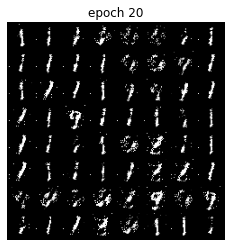

Epoch 20 of 100
Generator loss: 2.59259704, Discriminator loss: 0.50553539


118it [00:34,  3.37it/s]                                                                                               


Epoch 21 of 100
Generator loss: 2.69193844, Discriminator loss: 0.48462376


118it [00:35,  3.34it/s]                                                                                               


Epoch 22 of 100
Generator loss: 2.53251755, Discriminator loss: 0.52650116


118it [00:34,  3.43it/s]                                                                                               


Epoch 23 of 100
Generator loss: 2.39481266, Discriminator loss: 0.57541756


118it [00:34,  3.43it/s]                                                                                               


Epoch 24 of 100
Generator loss: 2.21714545, Discriminator loss: 0.66383838


118it [00:34,  3.43it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


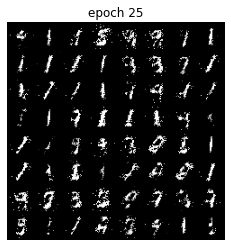

Epoch 25 of 100
Generator loss: 1.99405469, Discriminator loss: 0.72932076


118it [00:34,  3.43it/s]                                                                                               


Epoch 26 of 100
Generator loss: 1.94621954, Discriminator loss: 0.73335329


118it [00:34,  3.44it/s]                                                                                               


Epoch 27 of 100
Generator loss: 1.88218670, Discriminator loss: 0.76040087


118it [00:34,  3.43it/s]                                                                                               


Epoch 28 of 100
Generator loss: 1.86520077, Discriminator loss: 0.76136073


118it [00:34,  3.43it/s]                                                                                               


Epoch 29 of 100
Generator loss: 1.90175746, Discriminator loss: 0.73214195


118it [00:34,  3.42it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


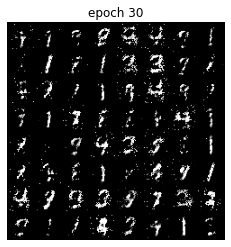

Epoch 30 of 100
Generator loss: 1.86360046, Discriminator loss: 0.76378849


118it [00:34,  3.43it/s]                                                                                               


Epoch 31 of 100
Generator loss: 1.75556865, Discriminator loss: 0.84506428


118it [00:34,  3.44it/s]                                                                                               


Epoch 32 of 100
Generator loss: 1.69757567, Discriminator loss: 0.81594732


118it [00:34,  3.43it/s]                                                                                               


Epoch 33 of 100
Generator loss: 1.70266836, Discriminator loss: 0.84647324


118it [00:34,  3.43it/s]                                                                                               


Epoch 34 of 100
Generator loss: 1.63326052, Discriminator loss: 0.84248758


118it [00:34,  3.42it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


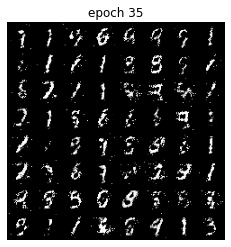

Epoch 35 of 100
Generator loss: 1.67015999, Discriminator loss: 0.86205179


118it [00:34,  3.42it/s]                                                                                               


Epoch 36 of 100
Generator loss: 1.63448843, Discriminator loss: 0.84950745


118it [00:34,  3.43it/s]                                                                                               


Epoch 37 of 100
Generator loss: 1.61290031, Discriminator loss: 0.88828312


118it [00:34,  3.39it/s]                                                                                               


Epoch 38 of 100
Generator loss: 1.59274757, Discriminator loss: 0.87812159


118it [00:34,  3.43it/s]                                                                                               


Epoch 39 of 100
Generator loss: 1.53800032, Discriminator loss: 0.90356153


118it [00:34,  3.43it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


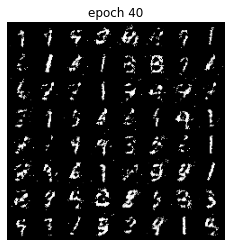

Epoch 40 of 100
Generator loss: 1.53378521, Discriminator loss: 0.89630727


118it [00:34,  3.43it/s]                                                                                               


Epoch 41 of 100
Generator loss: 1.50774620, Discriminator loss: 0.91966600


118it [00:34,  3.43it/s]                                                                                               


Epoch 42 of 100
Generator loss: 1.49860296, Discriminator loss: 0.91547094


118it [00:34,  3.43it/s]                                                                                               


Epoch 43 of 100
Generator loss: 1.50432510, Discriminator loss: 0.93269855


118it [00:34,  3.43it/s]                                                                                               


Epoch 44 of 100
Generator loss: 1.45476947, Discriminator loss: 0.93955334


118it [00:34,  3.42it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


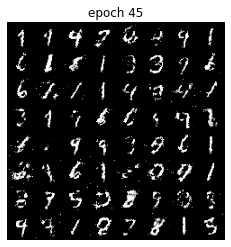

Epoch 45 of 100
Generator loss: 1.44635312, Discriminator loss: 0.95889967


118it [00:34,  3.42it/s]                                                                                               


Epoch 46 of 100
Generator loss: 1.38873708, Discriminator loss: 0.99530236


118it [00:34,  3.42it/s]                                                                                               


Epoch 47 of 100
Generator loss: 1.35735842, Discriminator loss: 1.00554383


118it [00:34,  3.43it/s]                                                                                               


Epoch 48 of 100
Generator loss: 1.36816776, Discriminator loss: 1.00065738


118it [00:34,  3.43it/s]                                                                                               


Epoch 49 of 100
Generator loss: 1.38528399, Discriminator loss: 0.99166413


118it [00:34,  3.43it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


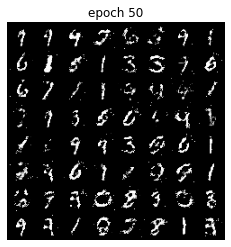

Epoch 50 of 100
Generator loss: 1.38862028, Discriminator loss: 1.01067180


118it [00:34,  3.43it/s]                                                                                               


Epoch 51 of 100
Generator loss: 1.33603254, Discriminator loss: 1.02696387


118it [00:34,  3.43it/s]                                                                                               


Epoch 52 of 100
Generator loss: 1.34038186, Discriminator loss: 1.02213620


118it [00:34,  3.42it/s]                                                                                               


Epoch 53 of 100
Generator loss: 1.32060657, Discriminator loss: 1.02848533


118it [00:34,  3.43it/s]                                                                                               


Epoch 54 of 100
Generator loss: 1.32148546, Discriminator loss: 1.03485814


118it [00:34,  3.41it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


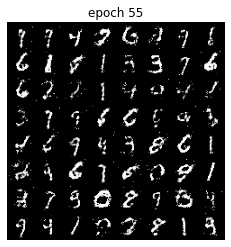

Epoch 55 of 100
Generator loss: 1.30572327, Discriminator loss: 1.03837473


118it [00:34,  3.43it/s]                                                                                               


Epoch 56 of 100
Generator loss: 1.33626364, Discriminator loss: 1.02925396


118it [00:34,  3.43it/s]                                                                                               


Epoch 57 of 100
Generator loss: 1.31516340, Discriminator loss: 1.03782356


118it [00:34,  3.43it/s]                                                                                               


Epoch 58 of 100
Generator loss: 1.28572099, Discriminator loss: 1.05302451


118it [00:34,  3.44it/s]                                                                                               


Epoch 59 of 100
Generator loss: 1.31603507, Discriminator loss: 1.04147075


118it [00:34,  3.43it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


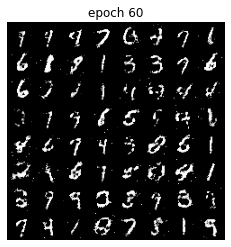

Epoch 60 of 100
Generator loss: 1.28080861, Discriminator loss: 1.05549623


118it [00:34,  3.42it/s]                                                                                               


Epoch 61 of 100
Generator loss: 1.28360603, Discriminator loss: 1.05630553


118it [00:34,  3.40it/s]                                                                                               


Epoch 62 of 100
Generator loss: 1.27764542, Discriminator loss: 1.06474279


118it [00:34,  3.41it/s]                                                                                               


Epoch 63 of 100
Generator loss: 1.27707791, Discriminator loss: 1.06629851


118it [00:34,  3.41it/s]                                                                                               


Epoch 64 of 100
Generator loss: 1.28380419, Discriminator loss: 1.05851911


118it [00:34,  3.42it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


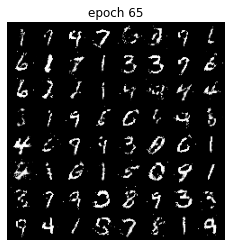

Epoch 65 of 100
Generator loss: 1.27161755, Discriminator loss: 1.06337443


118it [00:34,  3.42it/s]                                                                                               


Epoch 66 of 100
Generator loss: 1.27486405, Discriminator loss: 1.06419185


118it [00:34,  3.42it/s]                                                                                               


Epoch 67 of 100
Generator loss: 1.27245782, Discriminator loss: 1.06700759


118it [00:34,  3.41it/s]                                                                                               


Epoch 68 of 100
Generator loss: 1.26330338, Discriminator loss: 1.08091505


118it [00:34,  3.41it/s]                                                                                               


Epoch 69 of 100
Generator loss: 1.26668056, Discriminator loss: 1.07353969


118it [00:34,  3.41it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


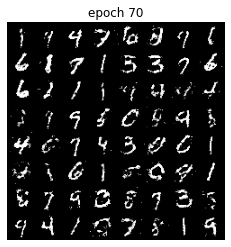

Epoch 70 of 100
Generator loss: 1.27246152, Discriminator loss: 1.06504931


118it [00:34,  3.43it/s]                                                                                               


Epoch 71 of 100
Generator loss: 1.25219116, Discriminator loss: 1.08203179


118it [00:34,  3.41it/s]                                                                                               


Epoch 72 of 100
Generator loss: 1.27106045, Discriminator loss: 1.07168804


118it [00:34,  3.40it/s]                                                                                               


Epoch 73 of 100
Generator loss: 1.26248137, Discriminator loss: 1.08318230


118it [00:34,  3.41it/s]                                                                                               


Epoch 74 of 100
Generator loss: 1.23438805, Discriminator loss: 1.08798602


118it [00:35,  3.33it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


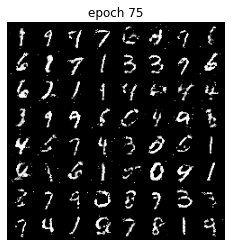

Epoch 75 of 100
Generator loss: 1.23182652, Discriminator loss: 1.09040148


118it [00:35,  3.31it/s]                                                                                               


Epoch 76 of 100
Generator loss: 1.23472149, Discriminator loss: 1.09297895


118it [00:35,  3.37it/s]                                                                                               


Epoch 77 of 100
Generator loss: 1.23742472, Discriminator loss: 1.08877224


118it [00:34,  3.38it/s]                                                                                               


Epoch 78 of 100
Generator loss: 1.23767521, Discriminator loss: 1.09618859


118it [00:34,  3.39it/s]                                                                                               


Epoch 79 of 100
Generator loss: 1.23247465, Discriminator loss: 1.09161822


118it [00:34,  3.38it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


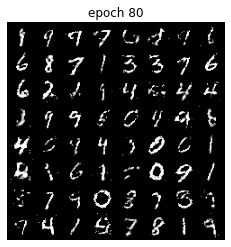

Epoch 80 of 100
Generator loss: 1.22296555, Discriminator loss: 1.09868623


118it [00:35,  3.37it/s]                                                                                               


Epoch 81 of 100
Generator loss: 1.22248468, Discriminator loss: 1.09933746


118it [00:35,  3.37it/s]                                                                                               


Epoch 82 of 100
Generator loss: 1.20771480, Discriminator loss: 1.10841272


118it [00:35,  3.35it/s]                                                                                               


Epoch 83 of 100
Generator loss: 1.22120072, Discriminator loss: 1.10123454


118it [00:35,  3.31it/s]                                                                                               


Epoch 84 of 100
Generator loss: 1.21219905, Discriminator loss: 1.10205433


118it [00:35,  3.34it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


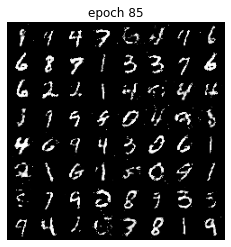

Epoch 85 of 100
Generator loss: 1.20957811, Discriminator loss: 1.10316162


118it [00:35,  3.36it/s]                                                                                               


Epoch 86 of 100
Generator loss: 1.22251734, Discriminator loss: 1.10361249


118it [00:34,  3.39it/s]                                                                                               


Epoch 87 of 100
Generator loss: 1.21140401, Discriminator loss: 1.11098191


118it [00:34,  3.40it/s]                                                                                               


Epoch 88 of 100
Generator loss: 1.20446559, Discriminator loss: 1.11621360


118it [00:35,  3.30it/s]                                                                                               


Epoch 89 of 100
Generator loss: 1.19524332, Discriminator loss: 1.10572274


118it [00:35,  3.35it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


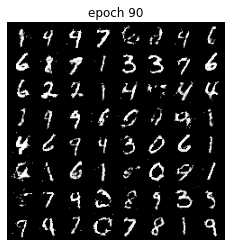

Epoch 90 of 100
Generator loss: 1.20032549, Discriminator loss: 1.10679787


118it [00:35,  3.32it/s]                                                                                               


Epoch 91 of 100
Generator loss: 1.19510750, Discriminator loss: 1.12744969


118it [00:34,  3.39it/s]                                                                                               


Epoch 92 of 100
Generator loss: 1.20452592, Discriminator loss: 1.10403029


118it [00:34,  3.38it/s]                                                                                               


Epoch 93 of 100
Generator loss: 1.18824068, Discriminator loss: 1.11212936


118it [00:35,  3.37it/s]                                                                                               


Epoch 94 of 100
Generator loss: 1.20811766, Discriminator loss: 1.10957843


118it [00:34,  3.38it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


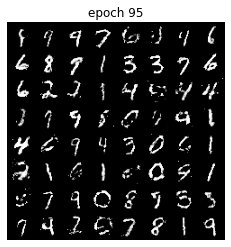

Epoch 95 of 100
Generator loss: 1.20133834, Discriminator loss: 1.11026637


118it [00:35,  3.36it/s]                                                                                               


Epoch 96 of 100
Generator loss: 1.19884186, Discriminator loss: 1.10843990


118it [00:34,  3.39it/s]                                                                                               


Epoch 97 of 100
Generator loss: 1.20392155, Discriminator loss: 1.11366924


118it [00:35,  3.35it/s]                                                                                               


Epoch 98 of 100
Generator loss: 1.19782017, Discriminator loss: 1.10793307


118it [00:34,  3.40it/s]                                                                                               


Epoch 99 of 100
Generator loss: 1.19447553, Discriminator loss: 1.11271963


118it [00:34,  3.38it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


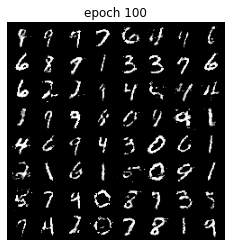

Epoch 100 of 100
Generator loss: 1.20050105, Discriminator loss: 1.10598400


In [40]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0

    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        # Discriminator training
        for _ in range(k):
            discriminator.zero_grad()
            real_data = data[0].to(device)
            label_real_data = label_real(real_data.size(0))
            output_real = discriminator(real_data)
            loss_real = discriminator_loss(output_real, label_real_data)
            loss_real.backward()

            fake_data = generator(create_noise(real_data.size(0), nz)).detach()
            label_fake_data = label_fake(fake_data.size(0))
            output_fake = discriminator(fake_data)
            loss_fake = discriminator_loss(output_fake, label_fake_data)
            loss_fake.backward()

            optim_d.step()
            loss_d += loss_real.item() + loss_fake.item()

        # Generator training
        generator.zero_grad()
        label_fake_data = label_real(batch_size)
        generated_data = generator(create_noise(batch_size, nz))
        output_fake = discriminator(generated_data)
        loss_g_i = generator_loss(output_fake, label_fake_data)
        loss_g_i.backward()
        optim_g.step()

        loss_g += loss_g_i.item()

    
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs_improved/gen_img{epoch+1}_improved.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(torch.tensor(loss_g)) #addressing error
    losses_d.append(torch.tensor(loss_d)) #addressing error
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [41]:
#!mkdir -p outputs_improved

In [42]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs_improved/generator_improved.pth')

DONE TRAINING


In [43]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_improved/generator_images_improved.gif', imgs)

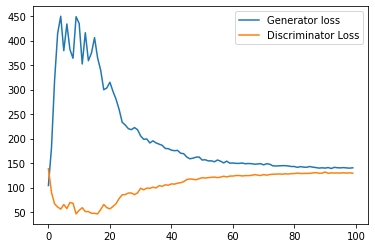

In [44]:
# plot and save the generator and discriminator loss
plt.figure()
#plt.plot(losses_g, label='Generator loss')
#plt.plot(losses_d, label='Discriminator Loss')
plt.plot([item.detach().cpu().numpy() for item in losses_g], label='Generator loss') #changed to address error
plt.plot([item.detach().cpu().numpy() for item in losses_d], label='Discriminator Loss') #changed to address error

plt.legend()
plt.savefig('outputs_improved/loss_improved.png')